In [8]:
# Student performance Analysis using machine learning
#This notebook explores student data,predicts exam scores,
#analyze study habits,segments students into groups
#Provides recommendations using machine learning models


import kagglehub

# Download latest version
path = kagglehub.dataset_download("fehu94/student-performances-data-set-cleared-of-outlier")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performances-data-set-cleared-of-outlier' dataset.
Path to dataset files: /kaggle/input/student-performances-data-set-cleared-of-outlier


In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
dataset_identifier = "fehu94/student-performances-data-set-cleared-of-outlier"
print(dataset_identifier)

fehu94/student-performances-data-set-cleared-of-outlier


In [11]:
!kaggle datasets download -d fehu94/student-performances-data-set-cleared-of-outlier

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [12]:
!unzip student-performances-data-set-cleared-of-outlier.zip

unzip:  cannot find or open student-performances-data-set-cleared-of-outlier.zip, student-performances-data-set-cleared-of-outlier.zip.zip or student-performances-data-set-cleared-of-outlier.zip.ZIP.


# Exploratory Data Analysis (EDA)

In [13]:
import pandas as pd
import os

# Use the path obtained from kagglehub.dataset_download
file_path = os.path.join(path, 'data_set_free_of_outliers.csv')
df = pd.read_csv(file_path)
df.head()

,Hours_Studied,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,0,2,0,7,73,0,1,0,0,1.0,0,1,3,0,0.0,0.0,0
1,19,0,1,0,8,59,0,1,2,1,1.0,0,0,4,0,1.0,1.0,1
2,24,1,1,1,7,91,1,1,2,1,1.0,0,2,4,0,2.0,0.0,0
3,29,0,1,1,8,98,1,1,1,1,1.0,0,0,4,0,0.0,1.0,0
4,19,1,1,1,6,65,1,1,3,1,2.0,0,2,4,0,1.0,0.0,1


In [14]:
df.shape

(5034, 18)

In [15]:
df.columns

Index(['Hours_Studied', 'Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores',
       'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],
      dtype='object')

In [16]:
df.shape

(5034, 18)

In [17]:
df.info

<bound method DataFrame.info of       Hours_Studied  Parental_Involvement  Access_to_Resources  \
0                23                     0                    2   
1                19                     0                    1   
2                24                     1                    1   
3                29                     0                    1   
4                19                     1                    1   
...             ...                   ...                  ...   
5029             25                     2                    1   
5030             23                     2                    1   
5031             20                     1                    0   
5032             10                     2                    2   
5033             15                     1                    0   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            7               73   
1                              0            8               59   
2                              1            7               91   
3                              1            8               98   
4                              1            6               65   
...                          ...          ...              ...   
5029                           0            7               76   
5030                           0            8               81   
5031                           1            6               65   
5032                           1            6               91   
5033                           1            9               94   

      Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
0                    0                1                  0              0   
1                    0                1                  2              1   
2                    1                1                  2              1   
3                    1                1                  1              1   
4                    1                1                  3              1   
...                ...              ...                ...            ...   
5029                 1                1                  1              2   
5030                 1                1                  3              0   
5031                 0                1                  3              0   
5032                 2                1                  2              0   
5033                 1                1                  0              1   

      Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
0                 1.0            0               1                  3   
1                 1.0            0               0                  4   
2                 1.0            0               2                  4   
3                 1.0            0               0                  4   
4                 2.0            0               2                  4   
...               ...          ...             ...                ...   
5029              1.0            0               1                  2   
5030              2.0            0               1                  2   
5031              1.0            0               0                  2   
5032              1.0            1               1                  3   
5033              1.0            0               1                  4   

      Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
0                         0                       0.0                 0.0   
1                         0                       1.0                 1.0   
2                         0                       2.0                 0.0   
3                         0                       0.0                 1.0   
4                         0                       1.0                 0.0   
...                     ...                       ...                 ...   
5029                      0              

In [18]:
df.describe

<bound method NDFrame.describe of       Hours_Studied  Parental_Involvement  Access_to_Resources  \
0                23                     0                    2   
1                19                     0                    1   
2                24                     1                    1   
3                29                     0                    1   
4                19                     1                    1   
...             ...                   ...                  ...   
5029             25                     2                    1   
5030             23                     2                    1   
5031             20                     1                    0   
5032             10                     2                    2   
5033             15                     1                    0   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            7               73   
1                              0            8               59   
2                              1            7               91   
3                              1            8               98   
4                              1            6               65   
...                          ...          ...              ...   
5029                           0            7               76   
5030                           0            8               81   
5031                           1            6               65   
5032                           1            6               91   
5033                           1            9               94   

      Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
0                    0                1                  0              0   
1                    0                1                  2              1   
2                    1                1                  2              1   
3                    1                1                  1              1   
4                    1                1                  3              1   
...                ...              ...                ...            ...   
5029                 1                1                  1              2   
5030                 1                1                  3              0   
5031                 0                1                  3              0   
5032                 2                1                  2              0   
5033                 1                1                  0              1   

      Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
0                 1.0            0               1                  3   
1                 1.0            0               0                  4   
2                 1.0            0               2                  4   
3                 1.0            0               0                  4   
4                 2.0            0               2                  4   
...               ...          ...             ...                ...   
5029              1.0            0               1                  2   
5030              2.0            0               1                  2   
5031              1.0            0               0                  2   
5032              1.0            1               1                  3   
5033              1.0            0               1                  4   

      Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
0                         0                       0.0                 0.0   
1                         0                       1.0                 1.0   
2                         0                       2.0                 0.0   
3                         0                       0.0                 1.0   
4                         0                       1.0                 0.0   
...                     ...                       ...                 ...   
5029                      0            

In [19]:
df.isnull().sum()

,0
Hours_Studied,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0
Family_Income,0


In [20]:
df['Gender'].unique()

array([0, 1])

In [21]:
df['Gender'].value_counts()

,count
Gender,
0,2926
1,2108


<Axes: >

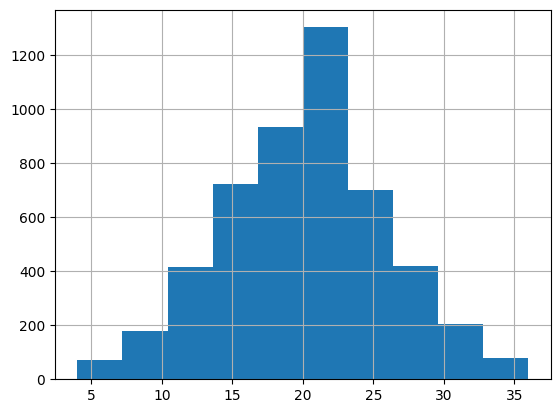

In [22]:
df['Hours_Studied'].hist()

<Axes: xlabel='Gender'>

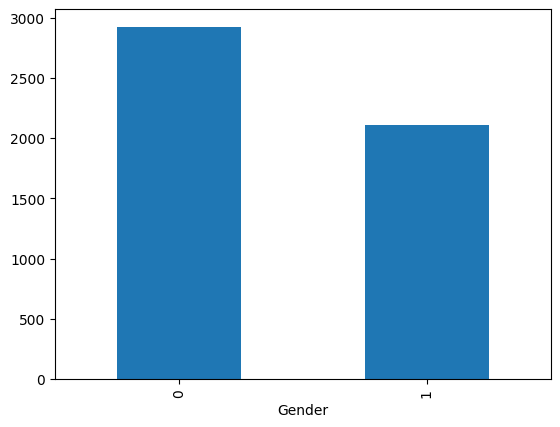

In [23]:
df['Gender'].value_counts().plot(kind='bar')

In [24]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [25]:
y=df['Hours_Studied']
x=df.drop('Hours_Studied',axis=1)
x.head(),y.head()

(   Parental_Involvement  Access_to_Resources  Extracurricular_Activities  \
 0                     0                    2                           0   
 1                     0                    1                           0   
 2                     1                    1                           1   
 3                     0                    1                           1   
 4                     1                    1                           1   
 
    Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  \
 0            7               73                 0                1   
 1            8               59                 0                1   
 2            7               91                 1                1   
 3            8               98                 1                1   
 4            6               65                 1                1   
 
    Tutoring_Sessions  Family_Income  Teacher_Quality  School_Type  \
 0                  0              0  

In [26]:
y.head()

,Hours_Studied
0,23
1,19
2,24
3,29
4,19


# Feature Engineering

In [27]:
import numpy as np
np.random.seed(42)
df['Exam_Score']=(
    df['Hours_Studied']*10
   +df['Previous_Scores']*0.6
    +df['Parental_Involvement']*2
    +df['Motivation_Level']*2.5
    +df['Teacher_Quality']*3
    +df['Sleep_Hours']*1.2
    -df['Distance_from_Home']*0.8
    -df['Learning_Disabilities']*5
    +np.random.normal(0,5,len(df))
)
df['Exam_Score']= df['Exam_Score'].clip(0,100)
df.head()

,Hours_Studied,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,0,2,0,7,73,0,1,0,0,1.0,0,1,3,0,0.0,0.0,0,100.0
1,19,0,1,0,8,59,0,1,2,1,1.0,0,0,4,0,1.0,1.0,1,100.0
2,24,1,1,1,7,91,1,1,2,1,1.0,0,2,4,0,2.0,0.0,0,100.0
3,29,0,1,1,8,98,1,1,1,1,1.0,0,0,4,0,0.0,1.0,0,100.0
4,19,1,1,1,6,65,1,1,3,1,2.0,0,2,4,0,1.0,0.0,1,100.0


In [28]:
x=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

# Regression Modeling

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Linear Regression:")
print("MSE:",mse)
print("R2 Score:",r2)

Linear Regression:
MSE: 0.0008369380873053848
R2 Score: -0.19363398828086287


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Random Forest Regression:")
print("MSE:",mse)
print("R2 Score:",r2)

Random Forest Regression:
MSE: 0.007711713238351844
R2 Score: -9.998379890690172


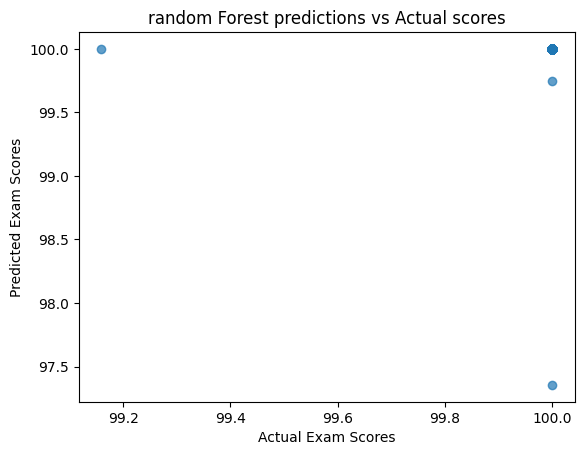

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,alpha=0.7)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("random Forest predictions vs Actual scores")
plt.show()

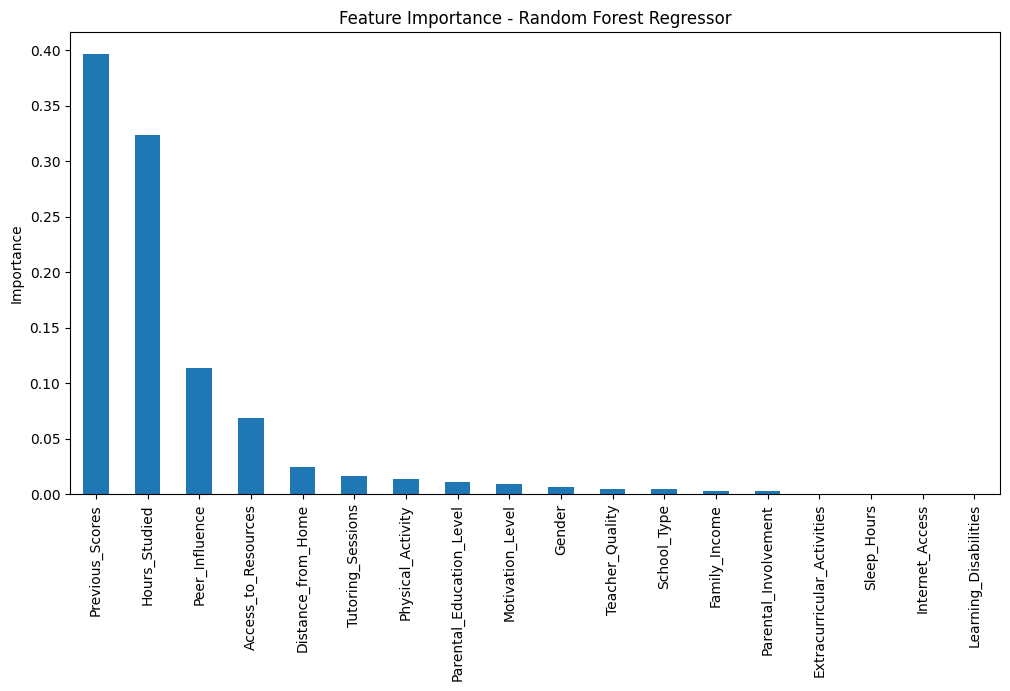

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
feature_importances=pd.Series(model.feature_importances_,index=x_train.columns)
feature_importances=feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance - Random Forest Regressor")
plt.ylabel("Importance")
plt.show()

# Model Explainability with SHAP

/tmp/ipython-input-3414409840.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)


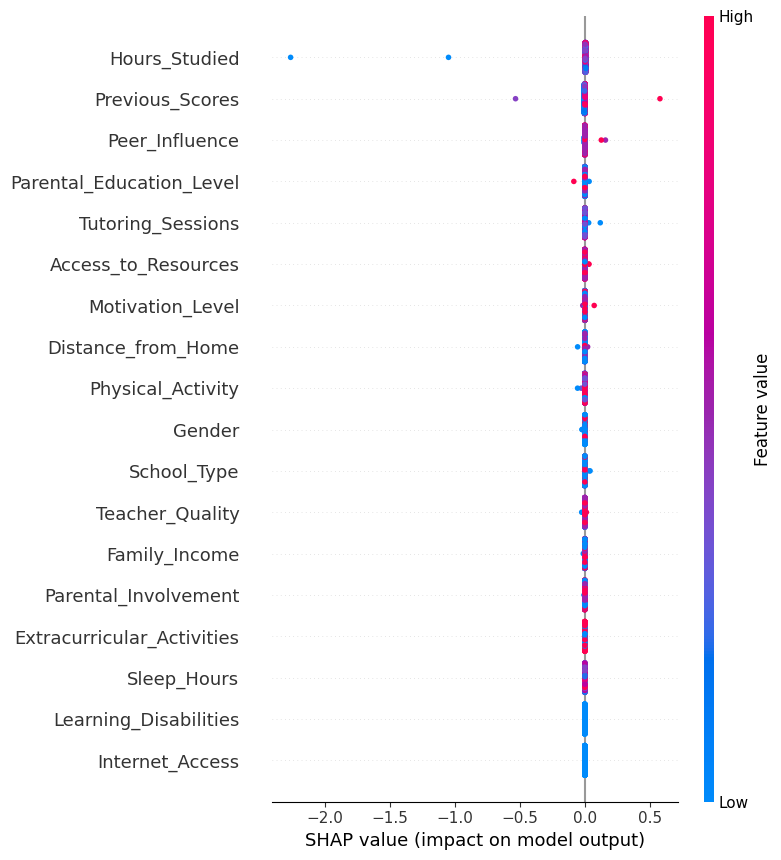

In [35]:
#Explainability with SHAP
# ------------------------------
import shap

# Create explainer for Random Forest
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(x_test)

# Summary plot of feature importance
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

# Optional: force plot for first prediction
shap.initjs()

In [36]:
#Interactive Visualizations with Plotly
# ------------------------------
import plotly.express as px
import pandas as pd

# Predicted vs Actual
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fig = px.scatter(df_plot, x='Actual', y='Predicted',
                 title='Random Forest Predictions vs Actual',
                 labels={'x':'Actual Exam Score','y':'Predicted Exam Score'})
fig.show()

# Feature Importance Bar Chart
feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

fig2 = px.bar(feature_importances, x=feature_importances.index, y=feature_importances.values,
              title='Feature Importance', labels={'x':'Features','y':'Importance'})
fig2.show()

#  Multi-Output Regression

In [37]:

# Create new target
df['Productivity_Index'] = df['Hours_Studied'] / df['Sleep_Hours']

# Features and multi-target
X_multi = df.drop(['Exam_Score', 'Productivity_Index'], axis=1)
y_multi = df[['Exam_Score', 'Productivity_Index']]

# Train-test split
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Multi-output Random Forest
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

multi_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
multi_model.fit(X_train_m, y_train_m)

# Predictions
y_pred_multi = multi_model.predict(X_test_m)

# Evaluate each target
from sklearn.metrics import mean_squared_error, r2_score

mse_exam = mean_squared_error(y_test_m['Exam_Score'], y_pred_multi[:,0])
r2_exam = r2_score(y_test_m['Exam_Score'], y_pred_multi[:,0])

mse_prod = mean_squared_error(y_test_m['Productivity_Index'], y_pred_multi[:,1])
r2_prod = r2_score(y_test_m['Productivity_Index'], y_pred_multi[:,1])

print("Multi-Output Random Forest Evaluation:")
print(f"Exam Score - MSE: {mse_exam:.2f}, R2: {r2_exam:.2f}")
print(f"Productivity Index - MSE: {mse_prod:.2f}, R2: {r2_prod:.2f}")

Multi-Output Random Forest Evaluation:
Exam Score - MSE: 0.01, R2: -10.00
Productivity Index - MSE: 0.00, R2: 1.00


# Clustering Students

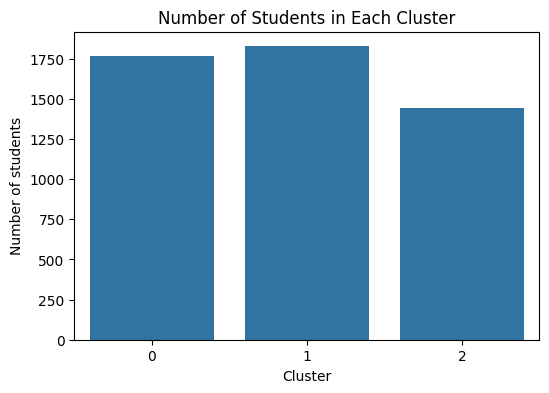

In [38]:
# Clustering Students (Segmentation Analysis)
# Group students based on features to understand performance patterns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['Exam_Score', 'Productivity_Index'], axis=1))

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize cluster sizes
import seaborn as sns
import matplotlib.pyplot as plt
cluster_counts=df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index,y=cluster_counts.values)
plt.title("Number of Students in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of students")
plt.show()

In [39]:
cluster_profile=df.groupby("Cluster").mean()
print("Cluster_profile:")
display(cluster_profile)

Cluster_profile:


,Hours_Studied,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Productivity_Index
Cluster,,,,,,,,,,,,,,,,,,,,
0,19.952462,1.069610,1.099038,1.00000,7.014714,75.389360,0.915110,1.0,1.279570,0.794567,1.219015,0.294284,1.178268,2.953028,0.0,0.706282,0.000000,0.421619,99.995617,2.981533
1,20.037240,1.115553,1.108981,0.00000,7.030120,74.982475,0.905257,1.0,1.276013,0.796824,1.177985,0.308324,1.215772,2.974808,0.0,0.698795,0.326396,0.418401,99.997658,2.995024
2,20.194310,1.087439,1.081888,0.85982,7.056211,74.823040,0.914643,1.0,1.306731,0.758501,1.197779,0.303262,1.160999,2.925052,0.0,0.689799,1.347675,0.415684,99.995985,3.004045


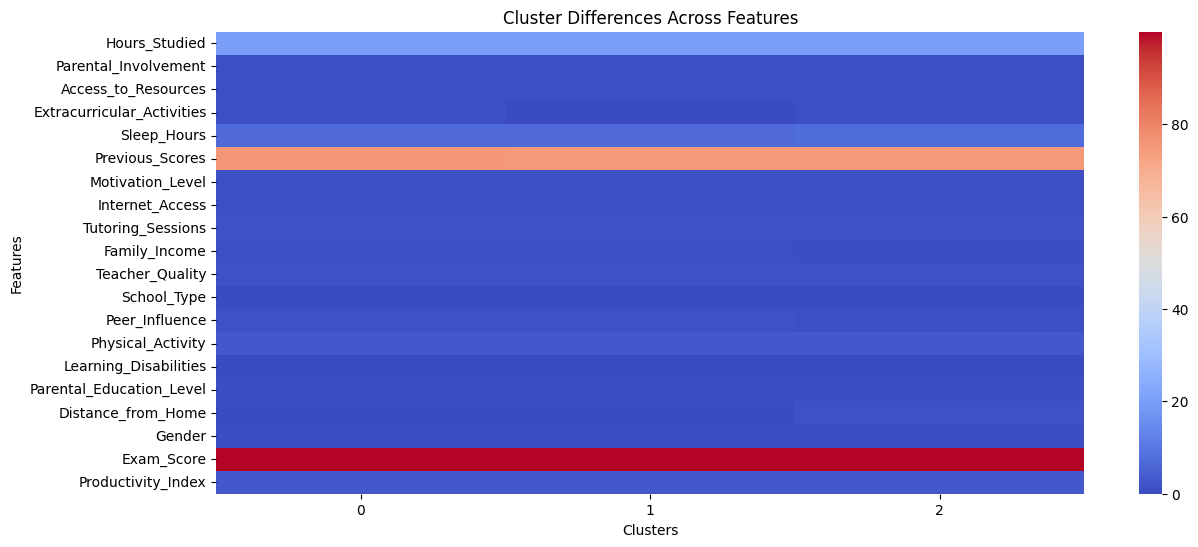

In [40]:
plt.figure(figsize=(14,6))
sns.heatmap(cluster_profile.T,
            cmap="coolwarm",annot=False)
plt.title("Cluster Differences Across Features")
plt.xlabel("Clusters")
plt.ylabel("Features")
plt.show()

# AUTOMATIC CLUSTER INSIGHTS

In [41]:
# AUTOMATIC INSIGHTS
print("\n--- Cluster Insights ---\n")

for c in df['Cluster'].unique():
    print(f"\nCluster {c} Analysis:")
    print("---------------------------")

    row = cluster_profile.loc[c]

    high = list(row.nlargest(3).index)
    low = list(row.nsmallest(3).index)

    print("Top Strengths:", high)
    print("Weak Areas:", low)


--- Cluster Insights ---


Cluster 1 Analysis:
---------------------------
Top Strengths: ['Exam_Score', 'Previous_Scores', 'Hours_Studied']
Weak Areas: ['Extracurricular_Activities', 'Learning_Disabilities', 'School_Type']

Cluster 0 Analysis:
---------------------------
Top Strengths: ['Exam_Score', 'Previous_Scores', 'Hours_Studied']
Weak Areas: ['Learning_Disabilities', 'Distance_from_Home', 'School_Type']

Cluster 2 Analysis:
---------------------------
Top Strengths: ['Exam_Score', 'Previous_Scores', 'Hours_Studied']
Weak Areas: ['Learning_Disabilities', 'School_Type', 'Gender']


# Cluster Based Recommendations

In [42]:
#  RECOMMENDATIONS
print("\n--- Recommendations for Each Cluster ---\n")

mean_vals = df.mean()

for c in df['Cluster'].unique():
    print(f"\nCluster {c} Recommendations:")
    print("------------------------------")

    row = cluster_profile.loc[c]

    if row['Hours_Studied'] < mean_vals['Hours_Studied']:
        print("- Increase study hours")

    if row['Sleep_Hours'] < 7:
        print("- Improve sleep habits")

    if row['Previous_Scores'] < mean_vals['Previous_Scores']:
        print("- Provide additional revision support")

    if row['Motivation_Level'] < mean_vals['Motivation_Level']:
        print("- Provide motivation and mentoring")

    if row['Parental_Involvement'] < mean_vals['Parental_Involvement']:
        print("- Encourage stronger parental involvement")

    print("----------------------------------------")


--- Recommendations for Each Cluster ---


Cluster 1 Recommendations:
------------------------------
- Increase study hours
- Provide additional revision support
- Provide motivation and mentoring
----------------------------------------

Cluster 0 Recommendations:
------------------------------
- Increase study hours
- Encourage stronger parental involvement
----------------------------------------

Cluster 2 Recommendations:
------------------------------
- Provide additional revision support
- Encourage stronger parental involvement
----------------------------------------


# Advanced Regression Models Comparison

In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt function

# Try 3 advanced models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)), # Calculate RMSE explicitly
        "R²": r2_score(y_test, pred)
    }

results

{'Random Forest': {'MAE': 0.0037132318503327335,
  'RMSE': np.float64(0.08781636088082814),
  'R²': -9.998379890690172},
 'Gradient Boosting': {'MAE': 0.001163977777851248,
  'RMSE': np.float64(0.0284061349012285),
  'R²': -0.15080604607885384}}

In [44]:
results_df=pd.DataFrame(results).T
results_df

,MAE,RMSE,R²
Random Forest,0.003713,0.087816,-9.998380
Gradient Boosting,0.001164,0.028406,-0.150806


# Best Model Selection

In [45]:
best_model=results_df['R²'].idxmax()
print("Best model:",best_model)

Best model: Gradient Boosting


# Notebook Summary

In [46]:


#Looked at student data and created new scores:Exam_Score and Productivity_Index
#Built models to predict student performance
#Grouped students into clusters to see patterns and differences
#Gave tips and recommendations for each group
#Showed a complete machine learning workflow from data to insights